In [129]:
from selenium import webdriver

from PIL import Image
import random
import time

In [130]:
PATH = "C:\Andy\Chromedriver\chromedriver.exe"
browser = webdriver.Chrome(PATH)
browser.get('http://flashbynight.com/drench/')


C:\Users\Jian\AppData\Local\Temp\ipykernel_20348\3696971621.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(PATH)


In [131]:
def get_moves(browser):
    webElement = browser.find_element_by_class_name("moveNum");
    return int(webElement.text);

def click_button(browser, color):
    browser.find_element_by_id(color).click();

def get_grid(browser):
    webElement = browser.find_element_by_id("canvasholder")
    webElement.screenshot("div.png");

In [132]:
RED_COLOR = (217, 36, 36 ,255)
LIGHT_COLOR = (220, 255, 207, 255)
PURPLE_COLOR = (113, 1, 238, 255)
PINK_COLOR = (234, 153, 252, 255)
GREEN_COLOR = (139, 208, 49, 255)
YELLOW_COLOR = (238, 210, 61, 255)

GREEN = "b1"
PINK = "b2"
PURPLE = "b3"
LIGHT = "b4"
RED = "b5"
YELLOW = "b6"

In [133]:
def print_grid(grid):
    for i in range(14):
        for j in range(14):
            print("%s " % grid[j][i], end="")
        print(" ");

def process_grid():
    im = Image.open('div.png')
    pix = im.load()
    cell_size = im.size[1]/14
    start_point = 1 + cell_size//2;
    grid = [[None for x in range(14)] for y in range(14)]
    for i in range(14):
        for j in range(14):
            
            across = start_point + j * cell_size
            down = start_point + i * cell_size

            color = pix[across,down]
            #$if(i==0 and j==0):
            #print(color)
            if(i==8 and j==2):
                print(color)
            if color == RED_COLOR:
                grid[j][i] = RED
            elif color == LIGHT_COLOR:
                grid[j][i] = LIGHT
            elif color == PURPLE_COLOR:
                grid[j][i] = PURPLE
            elif color == PINK_COLOR:
                grid[j][i] = PINK
            elif color == GREEN_COLOR:
                grid[j][i] = GREEN
            elif color == YELLOW_COLOR:
                grid[j][i] = YELLOW
            else:
                print("NO MATCH")
                raise Exception("Failed to match")
            pix[across,down]=(0,0,0,255)
    return grid, im

In [134]:
get_grid(browser)
grid, im = process_grid()
#print(grid[0][0])
print_grid(grid);

C:\Users\Jian\AppData\Local\Temp\ipykernel_20348\938028381.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  webElement = browser.find_element_by_id("canvasholder")


(238, 210, 61, 255)
b2 b3 b1 b5 b4 b2 b4 b2 b3 b1 b6 b2 b4 b5  
b1 b1 b4 b1 b3 b2 b3 b5 b2 b3 b6 b4 b6 b6  
b4 b3 b1 b6 b4 b2 b6 b5 b2 b6 b5 b6 b6 b1  
b2 b2 b6 b1 b6 b5 b2 b3 b4 b2 b4 b1 b2 b2  
b1 b5 b1 b4 b1 b2 b1 b5 b5 b2 b6 b4 b4 b1  
b6 b2 b4 b2 b3 b2 b6 b1 b1 b2 b6 b2 b4 b6  
b1 b6 b4 b2 b6 b3 b3 b4 b4 b6 b6 b3 b4 b4  
b2 b5 b5 b1 b2 b6 b6 b5 b2 b1 b1 b3 b6 b1  
b3 b2 b6 b2 b3 b6 b6 b5 b2 b4 b3 b3 b6 b5  
b6 b6 b3 b2 b1 b3 b1 b2 b5 b5 b1 b1 b6 b3  
b3 b1 b4 b5 b4 b4 b4 b2 b2 b2 b2 b6 b1 b4  
b6 b1 b5 b6 b4 b6 b5 b6 b1 b2 b5 b4 b1 b5  
b2 b1 b2 b2 b3 b4 b1 b1 b6 b1 b2 b4 b5 b1  
b4 b5 b2 b2 b6 b6 b2 b6 b5 b4 b2 b1 b2 b4  


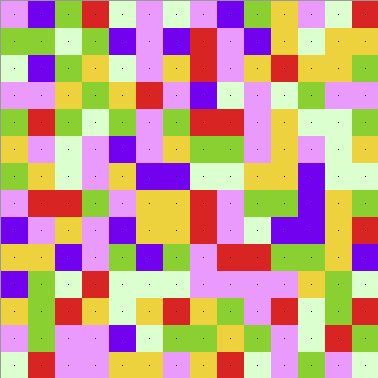

In [135]:
im

In [136]:
def str_it(x, y):
    return "(%s,%s)" % (x, y)

def calc_v1(grid):
    seen = [str_it(0, 0)]
    primary = grid[0][0]

    results = {
        "b1": 0,
        "b2": 0,
        "b3": 0,
        "b4": 0,
        "b5": 0, 
        "b6": 0
    }

    view_coord(grid, primary, seen, 0, 0, results)
    return results

def view_coord(grid, primary, seen, x, y, results):
    if x < 13:
        process_neighbor(grid, primary, seen, x+1, y, results)
    if x > 0:
        process_neighbor(grid, primary, seen, x-1, y, results)
    if y < 13:
        process_neighbor(grid, primary, seen, x, y+1, results)
    if y > 0:
        process_neighbor(grid, primary, seen, x, y-1, results)

def is_enclave(grid, primary, x, y):
    if(grid[x][y]==primary):
        return False
    if x < 13 and grid[x+1][y]!=primary:
        return False
    if x > 0 and grid[x-1][y]!=primary:
        return False
    if y < 13 and grid[x][y+1]!=primary:
        return False
    if y > 0 and grid[x][y-1]!=primary:
        return False
    return True
    
def process_neighbor(grid, primary, seen, x, y, results):
    target = str_it(x,y)
    if target not in seen:
        seen.append(target)
        if grid[y][x]==primary:
            view_coord(grid, primary, seen, x, y, results)
        else:
            if not is_enclave(grid, primary, x, y):
                results[grid[y][x]] += 1
            else:
                print(x, y)

In [137]:
calc_v1(grid)

{'b1': 1, 'b2': 0, 'b3': 1, 'b4': 0, 'b5': 0, 'b6': 0}

In [138]:
playing = True
while playing:
    if get_moves(browser) > 0:
        get_grid(browser)

        try:
            get_grid(browser)
            grid, im = process_grid()
            #print_grid(grid)

            options = calc_v1(grid)
            found_max = 0
            maxes = []
            for key, val in options.items():
                if val > found_max:
                    found_max = val
                    maxes = [key]
                elif val == found_max:
                    maxes.append(key)

            if found_max == 0:
                print("No options!")
            print(maxes)
            #print(options)
            choice = random.choice(maxes)
            click_button(browser, choice)
        except Exception:
            print("Stopped due to an error ? round over?")
            playing = False
    else:
        print("Stopped - out of moves!")
        playing = False

    time.sleep(.5)

C:\Users\Jian\AppData\Local\Temp\ipykernel_20348\938028381.py:2: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  webElement = browser.find_element_by_class_name("moveNum");
C:\Users\Jian\AppData\Local\Temp\ipykernel_20348\938028381.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  webElement = browser.find_element_by_id("canvasholder")


(238, 210, 61, 255)
['b1', 'b3']


C:\Users\Jian\AppData\Local\Temp\ipykernel_20348\938028381.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_id(color).click();


(238, 210, 61, 255)
['b1']
(238, 210, 61, 255)
2 1
['b4']
(238, 210, 61, 255)
['b1']
(238, 210, 61, 255)
['b3', 'b6']
(238, 210, 61, 255)
['b2']
(238, 210, 61, 255)
['b4', 'b5', 'b6']
(238, 210, 61, 255)
4 0
['b6']
(238, 210, 61, 255)
4 0
4 2
0 4
['b2']
(238, 210, 61, 255)
4 0
4 2
['b3', 'b4']
(238, 210, 61, 255)
4 0
4 2
['b4', 'b6']
(238, 210, 61, 255)
3 3
4 4
['b6']
(238, 210, 61, 255)
['b1']
(238, 210, 61, 255)
['b2']
(238, 210, 61, 255)
['b5']
(238, 210, 61, 255)
['b3']
(238, 210, 61, 255)
['b4']
(238, 210, 61, 255)
['b1']
(238, 210, 61, 255)
['b6']
(238, 210, 61, 255)
['b2']
(234, 153, 252, 255)
['b5']
(217, 36, 36, 255)
11 1
9 13
['b4']
(220, 255, 207, 255)
['b1']
(139, 208, 49, 255)
['b3', 'b6']
(238, 210, 61, 255)
['b3']
(113, 1, 238, 255)
['b2']
NO MATCH
Stopped due to an error ? round over?


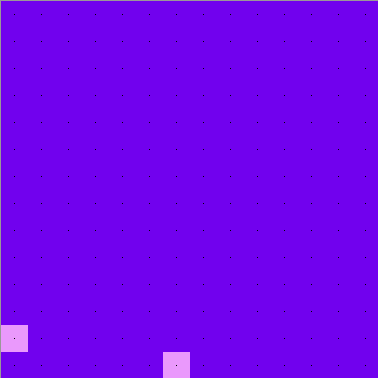

In [139]:
im